In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as clr
import numpy as np

In [2]:
ds = xr.open_dataset('/storage/shared/oceanparcels/input_data/ERA5/reanalysis-era5-single-level_wind10m_200612.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 744)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2006-12-01 ... 2006-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-01 01:05:32 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [67]:
ds.u10.isel(time=500)[3,15], ds.u10.isel(time=700)[3,15]

(<xarray.DataArray 'u10' ()>
 array(-3.983615, dtype=float32)
 Coordinates:
     longitude  float32 3.75
     latitude   float32 89.25
     time       datetime64[ns] 2006-12-21T20:00:00
 Attributes:
     units:      m s**-1
     long_name:  10 metre U wind component,
 <xarray.DataArray 'u10' ()>
 array(0.546666, dtype=float32)
 Coordinates:
     longitude  float32 3.75
     latitude   float32 89.25
     time       datetime64[ns] 2006-12-30T04:00:00
 Attributes:
     units:      m s**-1
     long_name:  10 metre U wind component)

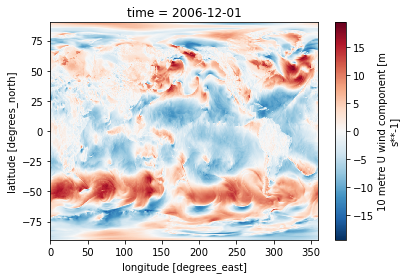

In [6]:
ds.u10['time'==1].plot()

In [24]:
left_min_lon = 340
left_max_lon = 359.75

min_lat = 40
max_lat = 65

left_slice = ds.loc[{'latitude': slice(max_lat,min_lat),
                      'longitude': slice(left_min_lon, left_max_lon)}]
left_slice

<xarray.Dataset>
Dimensions:    (longitude: 80, latitude: 101, time: 744)
Coordinates:
  * longitude  (longitude) float32 340.0 340.2 340.5 340.8 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 2006-12-01 ... 2006-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-01 01:05:32 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

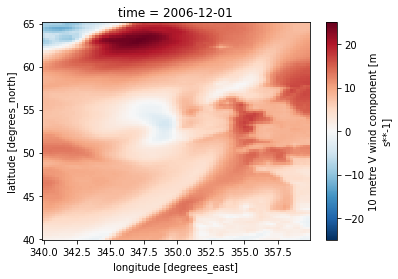

In [41]:
left_slice.v10['time'==1].plot()

In [27]:
right_min_lon = 0
right_max_lon = 10

min_lat = 40
max_lat = 65

right_slice = ds.loc[{'latitude': slice(max_lat, min_lat), #notice how the order is different
                      'longitude': slice(right_min_lon, right_max_lon)}]
right_slice

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 101, time: 744)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 ... 9.25 9.5 9.75 10.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 2006-12-01 ... 2006-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-01 01:05:32 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

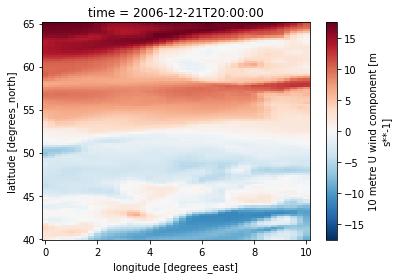

In [68]:
right_slice.u10.isel(time=500).plot()

In [69]:
right_slice.u10.isel(time=500)[3,15], right_slice.u10.isel(time=700)[3,15]

(<xarray.DataArray 'u10' ()>
 array(14.777099, dtype=float32)
 Coordinates:
     longitude  float32 3.75
     latitude   float32 64.25
     time       datetime64[ns] 2006-12-21T20:00:00
 Attributes:
     units:      m s**-1
     long_name:  10 metre U wind component,
 <xarray.DataArray 'u10' ()>
 array(-0.394703, dtype=float32)
 Coordinates:
     longitude  float32 3.75
     latitude   float32 64.25
     time       datetime64[ns] 2006-12-30T04:00:00
 Attributes:
     units:      m s**-1
     long_name:  10 metre U wind component)

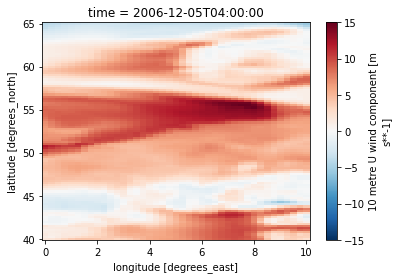

In [70]:
right_slice.u10.isel(time=100).plot()

In [45]:
#change the values of longitude coordinates to negative.
new_lon = left_slice.longitude.copy()
new_lon = new_lon - 360
print(new_lon)
# left_slice = ds.assign_coords(longitude=new_lon)

<xarray.DataArray 'longitude' (longitude: 80)>
array([-20.  , -19.75, -19.5 , -19.25, -19.  , -18.75, -18.5 , -18.25,
       -18.  , -17.75, -17.5 , -17.25, -17.  , -16.75, -16.5 , -16.25,
       -16.  , -15.75, -15.5 , -15.25, -15.  , -14.75, -14.5 , -14.25,
       -14.  , -13.75, -13.5 , -13.25, -13.  , -12.75, -12.5 , -12.25,
       -12.  , -11.75, -11.5 , -11.25, -11.  , -10.75, -10.5 , -10.25,
       -10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,  -8.5 ,  -8.25,
        -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,  -6.5 ,  -6.25,
        -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,  -4.5 ,  -4.25,
        -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,  -2.5 ,  -2.25,
        -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,  -0.5 ,  -0.25],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 340.0 340.2 340.5 340.8 ... 359.2 359.5 359.8


In [47]:
left_slice = left_slice.assign_coords(longitude=new_lon)

In [61]:
# result = xr.concat(left_slice, right_slice, dim='longitude')
result=[left_slice, right_slice]
result

[<xarray.Dataset>
 Dimensions:    (longitude: 80, latitude: 101, time: 744)
 Coordinates:
   * longitude  (longitude) float32 -20.0 -19.75 -19.5 ... -0.75 -0.5 -0.25
   * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 40.5 40.25 40.0
   * time       (time) datetime64[ns] 2006-12-01 ... 2006-12-31T23:00:00
 Data variables:
     u10        (time, latitude, longitude) float32 ...
     v10        (time, latitude, longitude) float32 ...
 Attributes:
     Conventions:  CF-1.6
     history:      2022-09-01 01:05:32 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...,
 <xarray.Dataset>
 Dimensions:    (longitude: 41, latitude: 101, time: 744)
 Coordinates:
   * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0 ... 9.25 9.5 9.75 10.0
   * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 40.5 40.25 40.0
   * time       (time) datetime64[ns] 2006-12-01 ... 2006-12-31T23:00:00
 Data variables:
     u10        (time, latitude, longitude) float32 ...
     v10        (time, latitude, longit

In [73]:
R=xr.combine_nested(result, concat_dim=["longitude"])
R

<xarray.Dataset>
Dimensions:    (longitude: 121, latitude: 101, time: 744)
Coordinates:
  * longitude  (longitude) float64 -20.0 -19.75 -19.5 -19.25 ... 9.5 9.75 10.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 40.5 40.25 40.0
  * time       (time) datetime64[ns] 2006-12-01 ... 2006-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 -1.37 -1.63 ... 3.07 1.929
    v10        (time, latitude, longitude) float32 -8.178 -8.058 ... 1.147

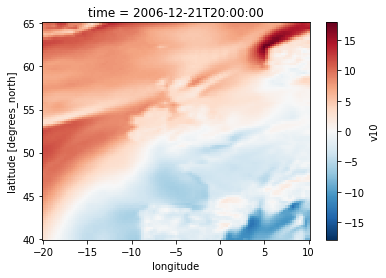

In [74]:
R.v10.isel(time=500).plot()

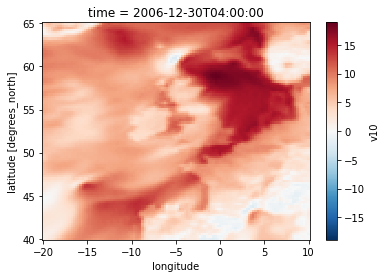

In [75]:
R.v10.isel(time=700).plot()